Model_2. Deep Learning Model for Enhanced Prediction Accuracy

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])

In [5]:
# Determine the number of unique values in each column.
unique_values = application_df.nunique()
print(unique_values)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [6]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()
print(application_type_counts)

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
threshold = 500
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()

# Create the list of application types to replace
application_types_to_replace = application_type_counts[application_type_counts < threshold].index.tolist()


# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
Other,276


In [8]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_counts = application_df['CLASSIFICATION'].value_counts()
print(classification_counts)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64


In [9]:
# You may find it helpful to look at CLASSIFICATION value counts >1
# Filter to show only values with a count greater than 1
classification_counts_gt_1 = classification_counts[classification_counts > 1]

# Display the filtered value counts
print(classification_counts_gt_1)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64


In [10]:
# Get the counts of each classification
classification_counts = application_df['CLASSIFICATION'].value_counts()

# Filter classifications with counts less than the threshold (including those with count = 1)
threshold = 800
classifications_to_replace = classification_counts[classification_counts < threshold].index.tolist()

# Replace the filtered classifications with "Other"
application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(classifications_to_replace, "Other")

# Verify the replacement
print(application_df['CLASSIFICATION'].value_counts())

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64


In [11]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_encoded = pd.get_dummies(application_df, drop_first=True)

# Display the first few rows of the new dataframe
# Convert boolean columns (True/False) to integers (1/0)
application_df_encoded = application_df_encoded.astype(int)

# Display the first few rows to verify
application_df_encoded.head()

# Check the shape of the resulting DataFrame
print(application_df_encoded.shape)

(34299, 37)


In [13]:
# Split our preprocessed data into our features and target arrays

# Split the data into features (X) and target (y)
X = application_df_encoded.drop('IS_SUCCESSFUL', axis=1)  # Features (all columns except the target)
y = application_df_encoded['IS_SUCCESSFUL']  # Target (dependent variable)

# Split the preprocessed data into a training and testing dataset
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

I implemented  following optimization methods in the second model:

Introduced a third hidden layer to increase the model's complexity, allowing it to learn more intricate patterns in the data.

Increased the number of training epochs to 120, enabling the model to have more iterations and potentially learn better from the data.

Used different activation functions for each layer in the neural network, aiming to optimize the learning process (e.g., ReLU and  Tanh)

Applied a 20% validation split (validation_split=0.2) to monitor the model's performance on unseen data during training.

In [30]:
# Define the model - deep neural net with an additional hidden layer

nn = tf.keras.models.Sequential()

# First hidden layer
input_dim = X_train_scaled.shape[1]  # Number of input features
nn.add(tf.keras.layers.Dense(units=80, input_dim=input_dim, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation="tanh"))

# Third hidden layer (newly added)
nn.add(tf.keras.layers.Dense(units=15, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 80)                  │           2,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 30)                  │           2,430 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 15)                  │             465 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,871 (22.93 KB)

 Trainable params: 5,871 (22.93 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
# Train the model
history = nn.fit(X_train_scaled, y_train, epochs=120, validation_split=0.2)

# Display the history keys (optional, to check the available data in history)
print(history.history.keys())

Epoch 1/120
686/686 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6905 - loss: 0.5951 - val_accuracy: 0.7254 - val_loss: 0.5585
Epoch 2/120
686/686 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7275 - loss: 0.5530 - val_accuracy: 0.7332 - val_loss: 0.5489
Epoch 3/120
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7333 - loss: 0.5472 - val_accuracy: 0.7383 - val_loss: 0.5497
Epoch 4/120
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7288 - loss: 0.5491 - val_accuracy: 0.7387 - val_loss: 0.5496
Epoch 5/120
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7338 - loss: 0.5462 - val_accuracy: 0.7305 - val_loss: 0.5475
Epoch 6/120
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7300 - loss: 0.5486 - val_accuracy: 0.7391 - val_loss: 0.5477
Epoch 7/120
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7384 - loss: 0.5407 - val_accuracy: 0.7356 - val_loss: 0.5478
Epoch 8/120
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7354 - loss: 0.5433 - val_accu

In [34]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - 2ms/step - accuracy: 0.7265 - loss: 0.5649
Loss: 0.5649429559707642, Accuracy: 0.7265306115150452


In [40]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimisation_1.h5")

In [42]:
from google.colab import files
files.download("AlphabetSoupCharity_Optimisation_1.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
import matplotlib.pyplot as plt

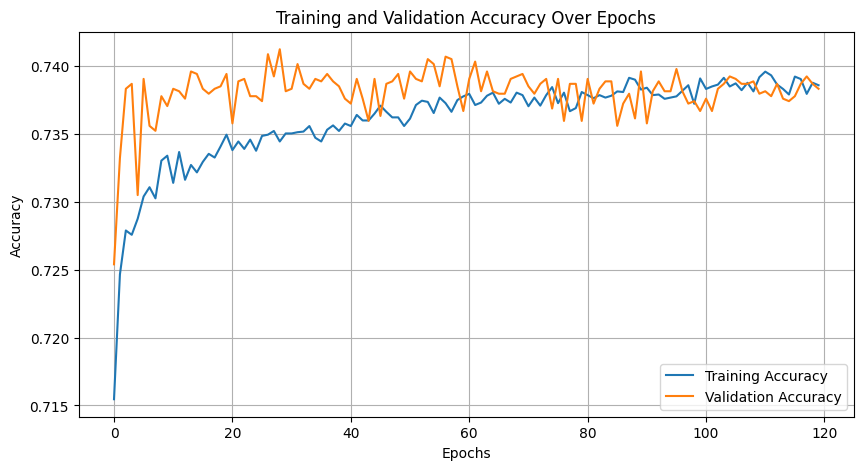

In [36]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

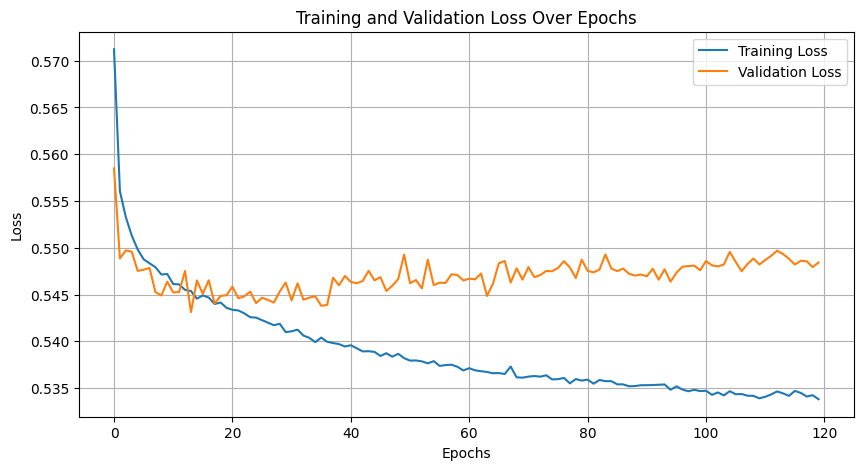

In [37]:
# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Comparison of Training, Validation, and Test Results:
Training Accuracy: ~74%
Validation Accuracy: ~74%
Test Accuracy: 72.65%
Training Loss: ~0.535
Validation Loss: ~0.545
Test Loss: 0.5649

The model is performing well with training and validation accuracies of ~74%, but there is a slight drop in test accuracy (72.65%), indicating room for improvement.
To achieve accuracy above 75%, optimizing the model through regularization, hyperparameter tuning, early stopping, and potentially adding complexity can help improve performance while maintaining generalization.

Model 3_optimizing the model through regularization, hyperparameter tuning, early stopping

In [38]:
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [39]:
# Define the model architecture
nn = tf.keras.models.Sequential()

# First hidden layer with L2 regularization and dropout
nn.add(tf.keras.layers.Dense(units=128, input_dim=X_train_scaled.shape[1],
                             activation='relu',
                             kernel_regularizer=regularizers.l2(0.001)))
nn.add(tf.keras.layers.Dropout(0.4))  # Dropout with 40% rate

# Second hidden layer with L2 regularization and dropout
nn.add(tf.keras.layers.Dense(units=64, activation='relu',
                             kernel_regularizer=regularizers.l2(0.001)))
nn.add(tf.keras.layers.Dropout(0.4))  # Dropout with 40% rate

# Third hidden layer with L2 regularization
nn.add(tf.keras.layers.Dense(units=32, activation='relu',
                             kernel_regularizer=regularizers.l2(0.001)))

# Output layer (binary classification)
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
           loss='binary_crossentropy',
           metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Learning rate reduction when validation loss plateaus
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Train the model with early stopping and learning rate reduction
history = nn.fit(X_train_scaled, y_train,
                 epochs=150,
                 batch_size=32,
                 validation_split=0.2,
                 callbacks=[early_stopping, lr_scheduler])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Test Loss: {model_loss}, Test Accuracy: {model_accuracy}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
686/686 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.6690 - loss: 0.7756 - val_accuracy: 0.7352 - val_loss: 0.6512 - learning_rate: 0.0010
Epoch 2/150
686/686 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7212 - loss: 0.6567 - val_accuracy: 0.7356 - val_loss: 0.6091 - learning_rate: 0.0010
Epoch 3/150
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7178 - loss: 0.6227 - val_accuracy: 0.7369 - val_loss: 0.5876 - learning_rate: 0.0010
Epoch 4/150
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7267 - loss: 0.5940 - val_accuracy: 0.7380 - val_loss: 0.5731 - learning_rate: 0.0010
Epoch 5/150
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7263 - loss: 0.5861 - val_accuracy: 0.7387 - val_loss: 0.5712 - learning_rate: 0.0010
Epoch 6/150
686/686 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7298 - loss: 0.5763 - val_accuracy: 0.7367 - val_loss: 0.5655 - learning_rate: 0.0010
Epoch 7/150
686/686 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7270 - loss: 

In [41]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 1s - 6ms/step - accuracy: 0.7252 - loss: 0.5647
Loss: 0.5646693706512451, Accuracy: 0.725218653678894


In [45]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimisation_2.h5")

In [46]:
from google.colab import files
files.download("AlphabetSoupCharity_Optimisation_2.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The tuned model has improved slightly in terms of reducing overfitting and improving validation accuracy. However, to achieve the target of 75% accuracy, further experimentation with model complexity, learning rate, and optimizers is needed.